In [98]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import LogNorm
from astropy.io import fits
from astropy.io import ascii
from itertools import chain
from scipy.signal import argrelextrema
from scipy.optimize import fsolve
from scipy.optimize import curve_fit
from scipy.stats import mode
from scipy.integrate import quad
from astropy.modeling import models
from astropy import units as u
from astropy.modeling.blackbody import FLAM
from astropy.visualization import quantity_support

In [3]:
# Master Darks
# 10 second master
dark_10s = []
for i in range(1, 10):
    file = fits.open('../Previous Data/dark-10s/dark_.0000000{0}.DARK.FIT'.format(i))
    dark_10s.append(file[0].data)
    file.close() 
mdark_10s = np.empty(shape=dark_10s[0].shape)
for i in range(len(dark_10s[0])):
    for j in range(len(dark_10s[0][0])):
        med = []
        for file in dark_10s:
            med.append(file[i][j])
        mdark_10s[i][j] = np.median(med)
try:
    fits.PrimaryHDU(mdark_10s).writeto('../Previous Data/masters/masterdark_10s.fits')
except OSError:
    print(mdark_10s)

# 30 seconds master
dark_30s = []
for i in range(1, 10):
    file = fits.open('../Previous Data/dark-30s/dark_.0000001{0}.DARK.FIT'.format(i))
    dark_30s.append(file[0].data)
    file.close()
mdark_30s = np.empty(shape=dark_30s[0].shape)
for i in range(len(dark_30s[0])):
    for j in range(len(dark_30s[0][0])):
        med = []
        for file in dark_30s:
            med.append(file[i][j])
        mdark_30s[i][j] = np.median(med)
try:
    fits.PrimaryHDU(mdark_30s).writeto('../Previous Data/masters/masterdark_30s.fits')
except OSError:
    print(mdark_30s)
    
# 2 min master
dark_2m = []
for i in range(1, 10):
    file = fits.open('../Previous Data/dark-2min/dark_.0000002{0}.DARK.FIT'.format(i))
    dark_2m.append(file[0].data)
    file.close()
mdark_2m = np.empty(shape=dark_2m[0].shape)
for i in range(len(dark_2m[0])):
    for j in range(len(dark_2m[0][0])):
        med = []
        for file in dark_2m:
            med.append(file[i][j])
        mdark_2m[i][j] = np.median(med)
try:
    fits.PrimaryHDU(mdark_2m).writeto('../Previous Data/masters/masterdark_2m.fits')
except OSError:
    print(mdark_2m)
    
# 3 min master
dark_3m = []
for i in range(1, 10):
    file = fits.open('../Previous Data/dark-3min/dark_.0000003{0}.DARK.FIT'.format(i))
    dark_3m.append(file[0].data)
    file.close()
mdark_3m = np.empty(shape=dark_3m[0].shape)
for i in range(len(dark_3m[0])):
    for j in range(len(dark_3m[0][0])):
        med = []
        for file in dark_3m:
            med.append(file[i][j])
        mdark_3m[i][j] = np.median(med)
try:
    fits.PrimaryHDU(mdark_3m).writeto('../Previous Data/masters/masterdark_3m.fits')
except OSError:
    print(mdark_3m)
    
# 5 min master
dark_5m = []
for i in range(1, 10):
    file = fits.open('../Previous Data/dark-5min/dark_.0000004{0}.DARK.FIT'.format(i))
    dark_5m.append(file[0].data)
    file.close()
mdark_5m = np.empty(shape=dark_3m[0].shape)
for i in range(len(dark_5m[0])):
    for j in range(len(dark_5m[0][0])):
        med = []
        for file in dark_5m:
            med.append(file[i][j])
        mdark_5m[i][j] = np.median(med)
'''
try:
    fits.PrimaryHDU(mdark_5m).writeto('../Previous Data/masters/masterdark_5m.fits')
except OSError:
    print(mdark_5m)
'''    

# 10 min master
dark_10m = []
for i in range(1, 10):
    file = fits.open('../Previous Data/dark-10min/dark_.0000005{0}.DARK.FIT'.format(i))
    dark_10m.append(file[0].data)
    file.close()
mdark_10m = np.empty(shape=dark_10m[0].shape)
for i in range(len(dark_10m[0])):
    for j in range(len(dark_10m[0][0])):
        med = []
        for file in dark_10m:
            med.append(file[i][j])
        mdark_10m[i][j] = np.median(med)
'''
try:
    fits.PrimaryHDU(mdark_10m).writeto('../Previous Data/masterdark_5m.fits')
except OSError:
    print(mdark_10m)
'''

[[ 8318.  8308.  8310. ...,  8247.  8239.  8243.]
 [ 8311.  8317.  8320. ...,  8240.  8238.  8237.]
 [ 8318.  8316.  8314. ...,  8243.  8238.  8242.]
 ..., 
 [ 8318.  8306.  8321. ...,  8232.  8229.  8230.]
 [ 8308.  8311.  8305. ...,  8235.  8230.  8234.]
 [ 8304.  8325.  8312. ...,  8237.  8237.  8241.]]
[[ 8314.  8323.  8315. ...,  8239.  8246.  8237.]
 [ 8324.  8319.  8315. ...,  8230.  8244.  8239.]
 [ 8327.  8321.  8316. ...,  8240.  8242.  8243.]
 ..., 
 [ 8328.  8317.  8316. ...,  8236.  8232.  8242.]
 [ 8317.  8316.  8302. ...,  8242.  8235.  8240.]
 [ 8313.  8314.  8317. ...,  8237.  8237.  8243.]]
[[ 8331.  8328.  8313. ...,  8256.  8249.  8246.]
 [ 8332.  8325.  8325. ...,  8240.  8260.  8240.]
 [ 8318.  8323.  8327. ...,  8249.  8247.  8250.]
 ..., 
 [ 8320.  8317.  8321. ...,  8246.  8240.  8255.]
 [ 8329.  8322.  8319. ...,  8248.  8239.  8250.]
 [ 8324.  8327.  8326. ...,  8239.  8253.  8243.]]
[[ 8336.  8339.  8328. ...,  8260.  8256.  8251.]
 [ 8329.  8327.  8328. ...

"\ntry:\n    fits.PrimaryHDU(mdark_10m).writeto('../Previous Data/masterdark_5m.fits')\nexcept OSError:\n    print(mdark_10m)\n"

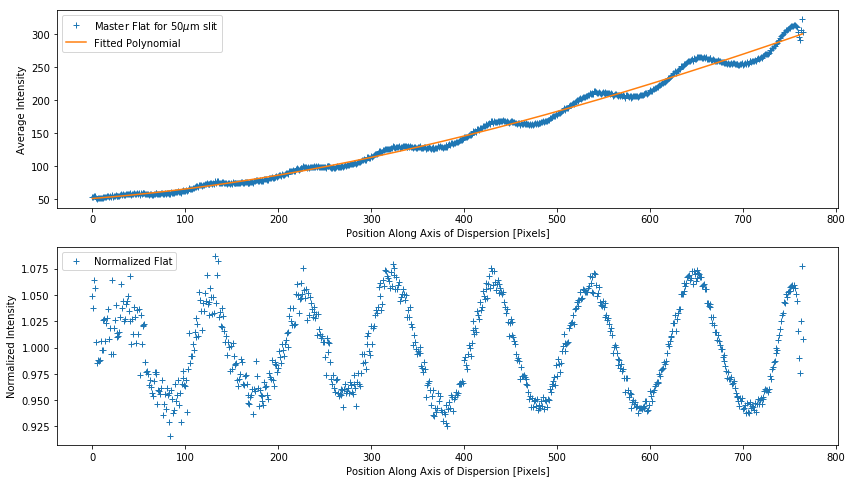

In [4]:
# getting 10 flat field images
def file_name(file_dir):
    L=[]
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.FIT':
                L.append(os.path.join(root, file))
    return L
flatnames=file_name('../Previous Data/flat_dome/')
flats=[]
flatsdata=[]
for i in range(len(flatnames)):
    flats.append(i)
    flatsdata.append(i)
    flats[i]=fits.open(flatnames[i])
    flatsdata[i]=flats[i][0].data

sum_flat=np.zeros(shape=(255,765))
for i in range(len(flatsdata)):
    sum_flat += flatsdata[i]
m_flat=(sum_flat[40:99]/10-mdark_30s[40:99]) #apply dark and cut the the slit part only
avgcounts_fl=np.mean(m_flat,axis=0) #average counts for each column(wl)
pix_pos=np.array([i for i in range(765)])

fig, ax = plt.subplots(2, 1, figsize=(14,8))

ax[0].plot(pix_pos,avgcounts_fl,'+', label=r'Master Flat for 50$\mu$m slit')

fit=np.poly1d(np.polyfit(pix_pos,avgcounts_fl,3))
ax[0].plot(pix_pos,fit(pix_pos),label='Fitted Polynomial')
m_flat_norm=avgcounts_fl/fit(pix_pos)

ax[1].plot(pix_pos,m_flat_norm, '+', label='Normalized Flat')

ax[0].set_xlabel('Position Along Axis of Dispersion [Pixels]')
ax[1].set_xlabel('Position Along Axis of Dispersion [Pixels]')
ax[0].set_ylabel('Average Intensity')
ax[1].set_ylabel('Normalized Intensity')
ax[0].legend()
ax[1].legend()
plt.show()

In [5]:
m_flat_norm.shape

(765,)

(32, 765)


Text(0.5,1,'background subtracted nebula spectrum')

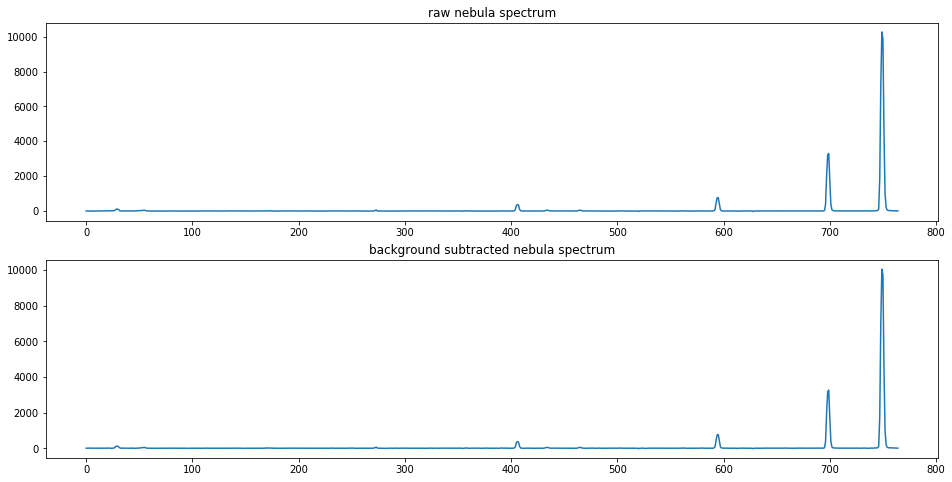

In [6]:
# getting science images of nebula
nebnames=file_name('../Previous Data/data_nebula/')
nebs=[]
nebsdata=[]
for i in range(len(nebnames)):
    nebs.append(i)
    nebsdata.append(i)
    nebs[i]=fits.open(nebnames[i])
    nebsdata[i]=nebs[i][0].data
#apply the master dark and flat
nebsprocessed=[]
nebsbg=[]
for i in range(len(nebsdata)):
    nebsprocessed.append(i)
    nebsbg.append(i)
    nebsprocessed[i]=(nebsdata[i][40:72,:]-mdark_10m[40:72,:])/m_flat_norm
    nebsbg[i]=(nebsdata[i][72:99,:]-mdark_10m[72:99,:])/m_flat_norm
print(nebsprocessed[i].shape)

sum_neb=np.zeros(shape=(32,765))
sum_nebbg=np.zeros(shape=(27,765))
for i in range(len(nebsprocessed)):
    sum_neb += nebsprocessed[i]
    sum_nebbg += nebsbg[i]
avgcounts_neb=np.mean(sum_neb,axis=0)/len(nebsprocessed)
sigcounts_neb=np.std(sum_neb,axis=0)/len(nebsprocessed)/np.sqrt(32)
avgcounts_nebbg=np.mean(sum_nebbg,axis=0)/len(nebsbg)
avgcounts_nebsub=avgcounts_neb-avgcounts_nebbg
plt.figure(figsize=(16,8))
ax1=plt.subplot(211)
ax2=plt.subplot(212)
ax1.plot(pix_pos,avgcounts_neb)
ax2.plot(pix_pos,avgcounts_nebsub)
ax1.set_title('raw nebula spectrum')
ax2.set_title('background subtracted nebula spectrum')

In [43]:
avgcounts_neb.shape

(765,)

In [8]:
index_peak=argrelextrema(avgcounts_neb,np.greater,order=20)
index_peak

(array([ 29,  55,  83, 113, 144, 170, 197, 231, 273, 321, 358, 406, 434,
        465, 504, 531, 595, 659, 699, 749]),)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


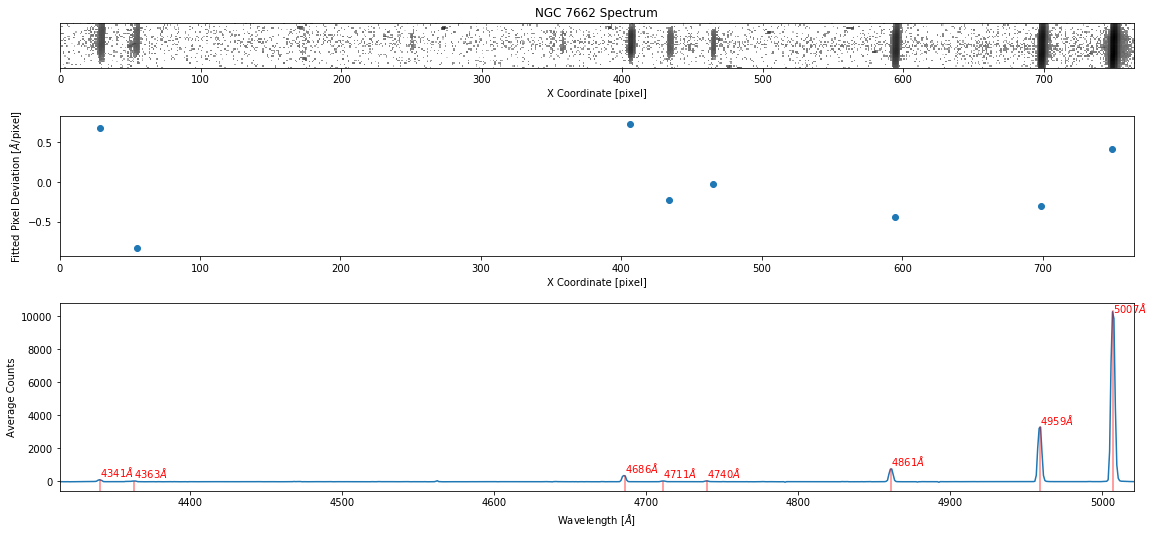

In [207]:
peak_pos=np.array([29,55,406,434,465,595,699,749])
wl=np.array([4341,4363,4686,4711,4740,4861,4959,5007])
wl_cali_fit=np.polyfit(peak_pos,wl,2)
secorder=np.poly1d(wl_cali_fit)
exp_wl=secorder(pix_pos)

fig = plt.figure(figsize=(16, 7.5))
spec = gridspec.GridSpec(nrows=3, ncols=1, height_ratios=[1, 3, 4])

ax1 = fig.add_subplot(spec[0])
ax2 = fig.add_subplot(spec[1])
ax3 = fig.add_subplot(spec[2])
ax1.imshow(np.log([row-avgcounts_nebbg for row in sum_neb]), cmap='gray_r')
ax3.plot(exp_wl,avgcounts_neb)
for i in range(len(wl)):
    ax3.axvline(x=wl[i], ymin=0, ymax=(avgcounts_nebsub[peak_pos[i]]+500)/11000,c='r',alpha=0.5)
    ax3.text(wl[i],avgcounts_nebsub[peak_pos[i]]+200,str(int(wl[i]))+'$\AA$',color='r')

ax1.set_yticks([])
ax1.set_xlabel('X Coordinate [pixel]')

ax3.set_xlabel('Wavelength [$\AA$]')
ax3.set_ylabel('Average Counts')
ax3.set_xlim(min(exp_wl), max(exp_wl))

ax2.scatter(peak_pos,wl-secorder(peak_pos))
ax2.set_xlabel('X Coordinate [pixel]')
ax2.set_ylabel('Fitted Pixel Deviation [$\AA$/pixel]')
ax2.set_xlim(0, 765)

ax1.set_title('NGC 7662 Spectrum')

fig.tight_layout()
plt.show()

##### Description of what is going on below
for the spec of star range [65:84,:]


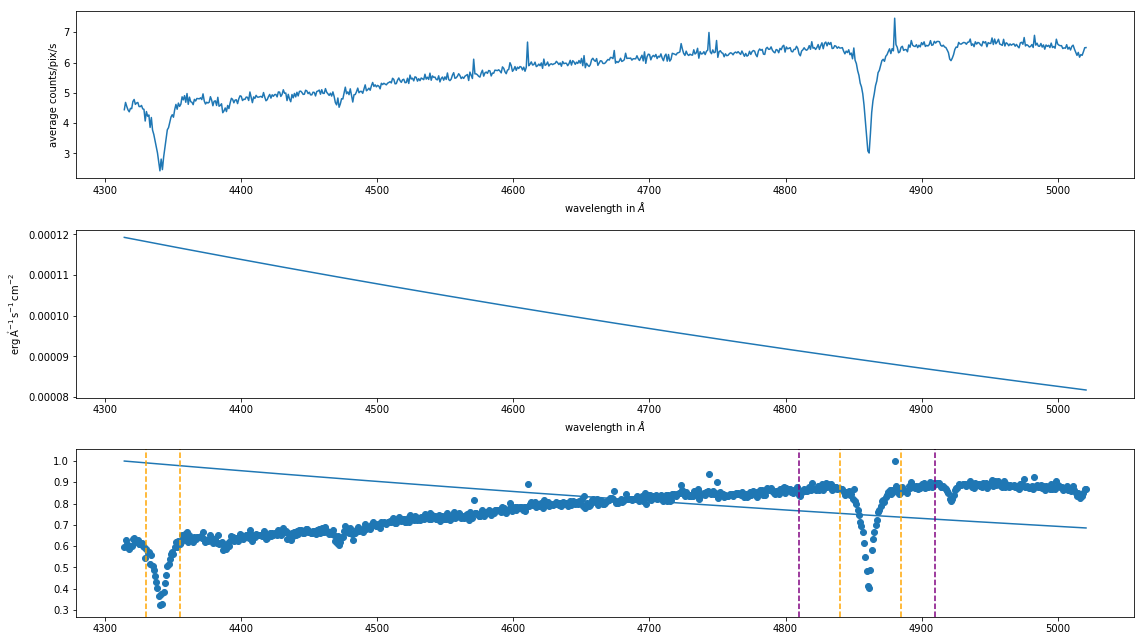

In [129]:
# getting science images of reference star
ref=file_name('../Previous Data/data_ref_star/')
refstardata=[]
refstarhead=[]
for i in range(len(ref)):
    refstardata.append(i)
    refstarhead.append(i)
    refstardata[i],refstarhead[i]=fits.getdata(ref[i],0,header=True)

# We don't use ref[0] & ref[7] because they're no good
# applying master dark and flat to science image with corresponding exposure time
# store master darks such that the exposure time corresponds to the file in ref list
mdarks=[mdark_5m,mdark_3m,mdark_3m,mdark_3m,mdark_3m,mdark_10s,mdark_30s,mdark_3m,mdark_2m]
exptime=[300,180,180,180,180,10,30,180,120]

refstartemp=[]
refstarcalib=[]
background=[]
mean_bg=[]
mean_bg_slit=np.ones(shape=(19,765))
mean_bg_slit_series=[mean_bg_slit,mean_bg_slit,mean_bg_slit,mean_bg_slit,mean_bg_slit,mean_bg_slit,mean_bg_slit,mean_bg_slit,mean_bg_slit]
for i in range(len(refstardata)):
    refstarcalib.append(i)
    refstartemp.append(i)
    background.append(i)
    mean_bg.append(i)
    #temp_refstar.append(i)
    refstartemp[i]=(refstardata[i]-mdarks[i])/m_flat_norm
    background[i]=refstartemp[i][40:64,:]       # width of spectrum[40:99]--> background[40:64]
    mean_bg[i]=np.mean(background[i])
    mean_bg_slit_series[i]=mean_bg_slit_series[i]*mean_bg[i]       # create artificial slit consists of mean background
    refstarcalib[i]=(refstartemp[i][65:84,:]-mean_bg_slit_series[i])/exptime[i] # subtract background from og and divide by exptime
    
sum_refstar=np.zeros(shape=(19,765))
for i in range(len(refstarcalib)):
    if i != 0 and i !=7:
        sum_refstar += refstarcalib[i]
    msum_refstar = sum_refstar/7
    refstar_1d = np.sum(msum_refstar,axis=0)/15

# Normalizing data of refstar_1d
norm_refstar1d=refstar_1d/np.amax(refstar_1d)

# Create blackbody fit for omicron Andromedae T 
T=13800
bb=models.BlackBody1D(temperature=T*u.K)
wl=exp_wl*u.AA
flux=bb(wl).to(FLAM, u.spectral_density(wl))
# Normalizing the bb flux
norm_bbflux=flux/np.amax(flux)

'''800
h=6.63e-34
c=3e8
T=13386
k=1.38e-23
B=(h*c)/(k*T)
denominator=[]
BBcurve_refstar=[]
for i in range(len(exp_wl)):
    BBcurve_refstar.append(i)
    denominator.append(i)
    numerator=2*h*c**2
    denominator[i]=(exp_wl[i]**5)*(np.exp(B/exp_wl[i])-1)
    BBcurve_refstar[i]=numerator/denominator[i]
'''    
fig = plt.figure(figsize=(16, 12))
#ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

#ax1.plot(pix_pos,refstar_1d)
#ax1.set_ylabel('average counts/pix/s')
#ax1.set_xlabel('pixel position')
ax2.plot(exp_wl,refstar_1d)
ax2.set_ylabel('average counts/pix/s')
ax2.set_xlabel('wavelength in $\AA$')
ax4.scatter(exp_wl,norm_refstar1d)
ax4.plot(exp_wl,norm_bbflux)
ax4.axvline(x=4330,ls='--',color='orange', label=)
ax4.axvline(x=4355,ls='--',color='orange')
ax4.axvline(x=4840,ls='--',color='orange')
ax4.axvline(x=4885,ls='--',color='orange')
ax4.axvline(x=4810,ls='--',color='purple')
ax4.axvline(x=4910,ls='--',color='purple')
with quantity_support():
    ax3.plot(exp_wl,flux)
    ax3.set_xlabel('wavelength in $\AA$')

fig.tight_layout()



Text(0.5,1,'sensitivity function')

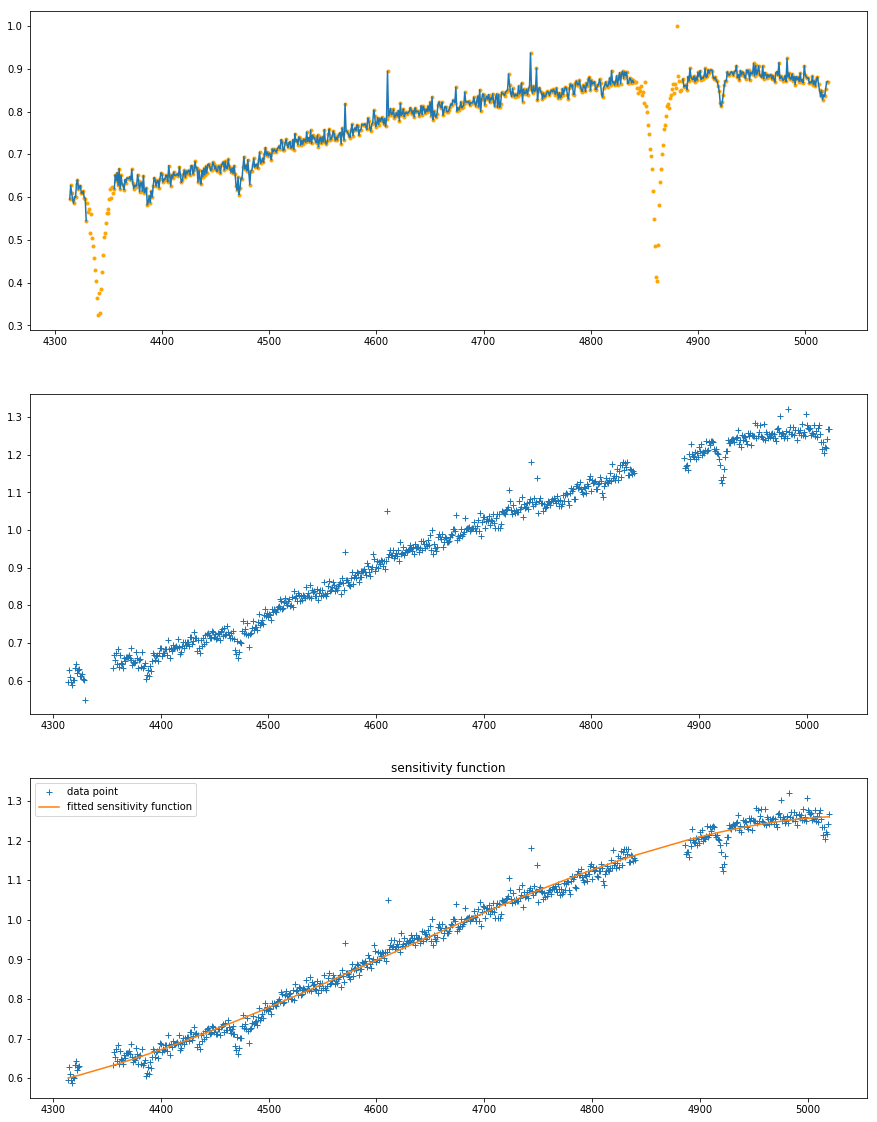

In [150]:
'''
# Finding the local mean of flux between 4300 to 4400 Angstrom
index_355to400=[i for i in range(len(exp_wl)) if exp_wl[i] <=4400 and exp_wl[i] >= 4355]
count_355to400=list(norm_refstar1d[index_355to400])
index_300to330=[i for i in range(len(exp_wl)) if exp_wl[i] <=4330]
count_300to330=list(norm_refstar1d[index_300to330])
count_4300to4400=np.append(count_300to330,count_355to400)
#print(count_4300to4400)

# Finding the local mean of flux between 4810 to 4910 Angstrom
index_810to840=[i for i in range(len(exp_wl)) if exp_wl[i] <=4840 and exp_wl[i] >= 4810]
count_810to840=list(norm_refstar1d[index_810to840])
index_885to910=[i for i in range(len(exp_wl)) if exp_wl[i] <=4910 and exp_wl[i] >= 4885]
count_885to910=list(norm_refstar1d[index_885to910])
count_4810to4910=np.append(count_810to840,count_885to910)
'''

# replace emission line values in norm_refstar_1d with 0
index_330to355=[i for i in range(len(exp_wl)) if exp_wl[i] <4355 and exp_wl[i] > 4330]
index_840to885=[i for i in range(len(exp_wl)) if exp_wl[i] <4885 and exp_wl[i] > 4840]
#temp=norm_refstar1d

temp1=[]
for i in range(len(norm_refstar1d)):
    temp1.append(i)
    temp1[i]=norm_refstar1d[i]
for i in range(len(index_330to355)):
    temp1[index_330to355[i]]=0
for i in range(len(index_840to885)):
    temp1[index_840to885[i]]=0

temp1=np.asarray(temp1)
mask_refstar1=np.ma.masked_where(temp1<=0,temp1)
refstarbb_ratio=temp1/norm_bbflux
mask_refstarbb_ratio=np.ma.masked_where(refstarbb_ratio<=0,refstarbb_ratio)
'''
#print(index_840to885)
for i in range(len(index_330to355)):
    temp[index_330to355[i]]=0
for i in range(len(index_840to885)):
    temp[index_840to885[i]]=0

# Generate refstar spec without emssion line by masking the lines
mask_refstar=np.ma.masked_where(temp<=0,temp)

# Dividing the new refstar spec with the normalized BB curve
refstarbb_ratio=temp/norm_bbflux
mask_refstarbb_ratio=np.ma.masked_where(refstarbb_ratio<=0,refstarbb_ratio)
'''
# Plot
fig = plt.figure(figsize=(15, 20))
ax1=fig.add_subplot(311)
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(313)

ax1.plot(exp_wl,mask_refstar1)
ax1.scatter(exp_wl,norm_refstar1d,marker='.',color='orange')
ax2.plot(exp_wl,mask_refstarbb_ratio,'+',label='data point')

cut_wl=np.hstack((exp_wl[0:12],exp_wl[46:573],exp_wl[621:764]))
cut_ratio=np.hstack((mask_refstarbb_ratio[0:12],mask_refstarbb_ratio[46:573],mask_refstarbb_ratio[621:764]))
plt.figure(figsize=(15,7))
ax3.plot(cut_wl,cut_ratio,'+',label='data point')
sensitivity_fit=np.poly1d(np.polyfit(cut_wl,cut_ratio,3))
ax3.plot(cut_wl,sensitivity_fit(cut_wl),label='fitted sensitivity function')
ax3.legend()
ax3.set_title('sensitivity function')

192.405713488
69.9840355124
377.501658994
43.2448475232
43.8881112109
648.048621044
2624.66141211
7987.91193141


[]

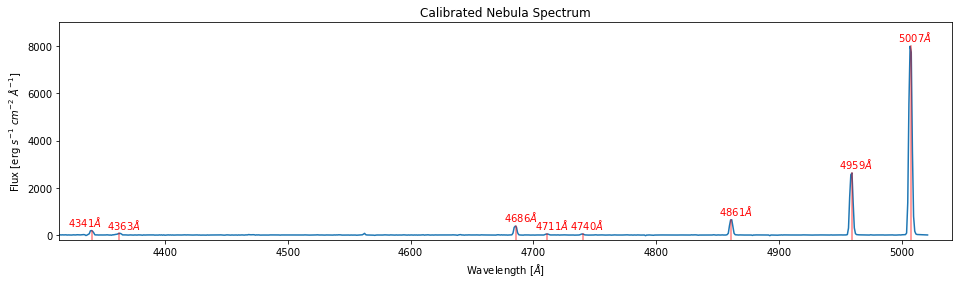

In [251]:
neb_fluxcali=avgcounts_nebsub/sensitivity_fit(exp_wl)
sig_neb_fluxcali=sigcounts_neb/sensitivity_fit(exp_wl)
plt.figure(figsize=(16,4))
plt.plot(exp_wl, neb_fluxcali)
for i in range(len(wl)):
    print(neb_fluxcali[peak_pos[i]])
    plt.plot([wl[i], wl[i]], [-200, neb_fluxcali[peak_pos[i]]],c='r',alpha=0.5)
    if i==0:
        plt.text(wl[i]-20, neb_fluxcali[peak_pos[i]]+200,str(int(wl[i]))+'$\AA$',color='r')
    else:
        plt.text(wl[i]-10, neb_fluxcali[peak_pos[i]]+200,str(int(wl[i]))+'$\AA$',color='r')
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Flux [erg $s^{-1}$ $cm^{-2}$ $\AA^{-1}$]')
plt.xlim(min(exp_wl), max(exp_wl)+20)
plt.ylim(-200, 9000)
plt.title('Calibrated Nebula Spectrum')

plt.plot()

In [44]:
wl_peak=argrelextrema(neb_fluxcali,np.greater,order=20)
print(wl_peak)
wl_peakfinal=np.array([29,55,406,434,465,595,699,749])
print(neb_fluxcali[wl_peakfinal])

(array([ 29,  55,  83, 113, 145, 170, 202, 250, 273, 329, 358, 406, 434,
       465, 504, 595, 660, 699, 749]),)
[  192.40571349    69.98403551   377.50165899    43.24484752    43.88811121
   648.04862104  2624.66141211  7987.91193141]


In [45]:
print('The measured emission line strengths are as follows:')
print('\nLines           counts          counts error')
lines=np.array(['Hgamma    ','OIII4363','HeII    ','ArIV4711','ArIV4740','Hbeta    ','OIII4959','OIII5007'])
for i in range(len(wl_peakfinal)):
    print(lines[i]+'\t'+ str(neb_fluxcali[wl_peakfinal][i])+'\t'+str(sig_neb_fluxcali[wl_peakfinal][i]))

The measured emission line strengths are as follows:

Lines           counts          counts error
Hgamma    	192.405713488	20.9030432045
OIII4363	69.9840355124	7.75146398015
HeII    	377.501658994	55.8091912087
ArIV4711	43.2448475232	5.53938042546
ArIV4740	43.8881112109	6.42546324554
Hbeta    	648.048621044	66.135496883
OIII4959	2624.66141211	220.720611023
OIII5007	7987.91193141	688.158538497


In [46]:
table = []
for i in range(1, len(wl_peakfinal)):
    table.append([lines[i], neb_fluxcali[wl_peakfinal][i], sig_neb_fluxcali[wl_peakfinal][i]])
print(table)

[['OIII4363', 69.98403551241023, 7.7514639801505467], ['HeII    ', 377.50165899446978, 55.809191208703645], ['ArIV4711', 43.244847523212108, 5.539380425464743], ['ArIV4740', 43.888111210876858, 6.4254632455369611], ['Hbeta    ', 648.04862104403276, 66.13549688302237], ['OIII4959', 2624.6614121114535, 220.72061102304369], ['OIII5007', 7987.9119314141162, 688.15853849677876]]


In [314]:
# Gaussian fit function
def gaussian(x, a, m, s, o):
    gauss = a*np.exp(-1/2*((x-m)/(s))**2)+o
    return gauss

def fit_gaussian(axis, x, y, err):
    inits = [max(y), np.mean(x), 1, 0]
    params, covar = curve_fit(gaussian, x, y, sigma=err, p0=inits)
    
    domain = np.linspace(x[0], x[-1], 300)
    
    '''
    axis[0].errorbar(x, y , err, color='C0', linestyle='--', label='Data', capsize=5)
    axis[1].plot(domain, gaussian(domain, *params), color='C1', label='Fitted Gaussian')
    axis[1].fill_between(domain, gaussian(domain, *params), params[3], color='C1', label='Integrated Area', alpha=.2)
    axis[2].errorbar(x, y , err, color='C0', linestyle='--', label='Data', capsize=5)
    axis[2].plot(domain, gaussian(domain, *params), color='C1', label='Fitted Gaussian')
    axis[2].fill_between(domain, gaussian(domain, *params), params[3], color='C1', label='Integrated Area', alpha=.2)
    
    axis[0].set_xlim(x[0], x[-1])
    axis[1].set_xlim(x[0], x[-1])
    axis[2].set_xlim(x[0], x[-1])
    axis[0].set_ylim(axis[2].get_ylim())
    axis[1].set_ylim(axis[2].get_ylim())
    
    #axis[0].set_xlabel('Wavelength [$\AA$]')
    '''
    
    return (*params), quad(gaussian, x[0], x[-1], args=(params[0], params[1], params[2], 0))[0], np.sqrt(
        quad(gaussian, x[0], x[-1], args=(params[0], params[1], params[2], 0))[0])

Fluxes:  68.1197248602 2777.80242258 7307.95782065
Flux Ratio: 148.059321495 +/- 17.9995233608

Nebula Tempurature
11196.6609121  ( + 517.411783386 / - 421.265730056 )
Literature Value: 12500 K (No Quoted Error)
F-score: -1.9533933744526453


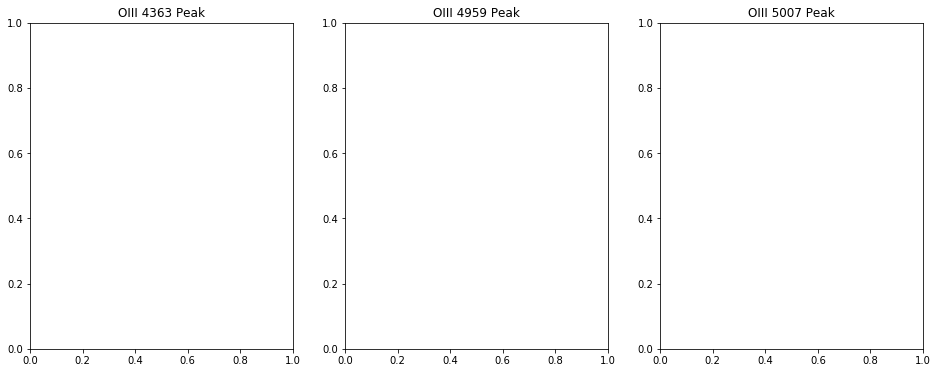

In [315]:
# O3 Line ratio, integrating around peaks
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

OIII_4363 = fit_gaussian(axs[0], exp_wl[55-20:55+20], neb_fluxcali[55-20:55+20], sig_neb_fluxcali[55-20:55+20])[0]
OIII_4959 = fit_gaussian(axs[1], exp_wl[699-20:699+20], neb_fluxcali[699-20:699+20], sig_neb_fluxcali[699-20:699+20])[0]
OIII_5007 = fit_gaussian(axs[2], exp_wl[749-20:749+20], neb_fluxcali[749-20:749+20], sig_neb_fluxcali[749-20:749+20])[0]

OIII_4363_sig = np.sqrt(OIII_4363)
OIII_4959_sig = np.sqrt(OIII_4959)
OIII_5007_sig = np.sqrt(OIII_5007)

axs[0].set_title('OIII 4363 Peak')  
axs[1].set_title('OIII 4959 Peak') 
axs[2].set_title('OIII 5007 Peak')         

print('Fluxes: ', OIII_4363, OIII_4959, OIII_5007)
OIII_ratio = (OIII_4959+OIII_5007)/(OIII_4363)
OIII_ratio_sig = OIII_ratio*np.sqrt(pow(OIII_4363_sig/OIII_4363, 2)+
                                    (OIII_4959_sig**2+OIII_5007_sig**2)/pow(OIII_4959+OIII_5007, 2))
print('Flux Ratio:', OIII_ratio, '+/-', OIII_ratio_sig)

# Solve for T by finding roots
function = lambda T : 7.9*np.exp(3.29e4 / T)-OIII_ratio*(1+1.8*.45*pow(T, -1/2))
function_pos = lambda T : 7.9*np.exp(3.29e4 / T)-(OIII_ratio+OIII_ratio_sig)*(1+1.8*.45*pow(T, -1/2))
function_neg = lambda T : 7.9*np.exp(3.29e4 / T)-(OIII_ratio-OIII_ratio_sig)*(1+1.8*.45*pow(T, -1/2))
roots = fsolve(function, 10000)
roots_pos = fsolve(function_pos, 10000)
roots_neg = fsolve(function_neg, 10000)

print('\nNebula Tempurature')
print(*roots, ' ( +',*roots_neg-roots, '/ -',*roots-roots_pos,')')
print('Literature Value: 12500 K (No Quoted Error)')
print('F-score: {0}'.format(*(roots-12500)/np.sqrt((roots_neg-roots)**2 + (roots-roots_pos)**2)))

plt.show()

Fluxes:  132.85960451483302 119.46500300731284
Flux Ratio:  1.1121215516706617 +/- 0.140221701704


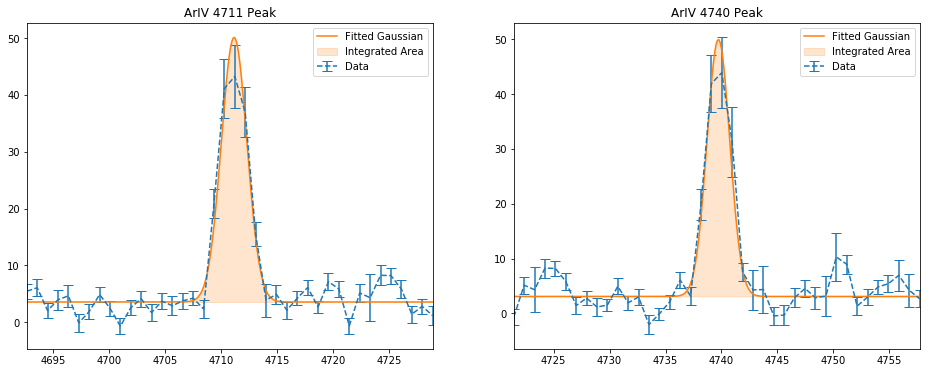

In [51]:
# ArIV Line ratio, integrating around peaks
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

ArIV_4711 = fit_gaussian(axs[0], exp_wl[434-20:434+20], neb_fluxcali[434-20:434+20], sig_neb_fluxcali[434-20:434+20])[0]
ArIV_4740 = fit_gaussian(axs[1], exp_wl[465-20:465+20], neb_fluxcali[465-20:465+20], sig_neb_fluxcali[465-20:465+20])[0]

ArIV_4711_sig = np.sqrt(ArIV_4711)
ArIV_4740_sig = np.sqrt(ArIV_4740)

axs[0].set_title('ArIV 4711 Peak')
axs[1].set_title('ArIV 4740 Peak')

print('Fluxes: ', ArIV_4711, ArIV_4740)
ArIV_ratio = ArIV_4711/ArIV_4740
ArIV_ratio_sig=ArIV_ratio*np.sqrt((ArIV_4711_sig/ArIV_4711)**2 + 
                                  (ArIV_4740_sig/ArIV_4740)**2 )
print('Flux Ratio: ', ArIV_ratio, '+/-', ArIV_ratio_sig)

Number density of nebula is 1862.1 with a 1 sigma range of 1000 to 3467.4.
Number density of nebula is 1862.1 with a 3 sigma range of 288.4 to 12023.
Literature value (Atomic Data from the Iron Project, Chen 2000) is between 3x10^3 and 17x10^3.


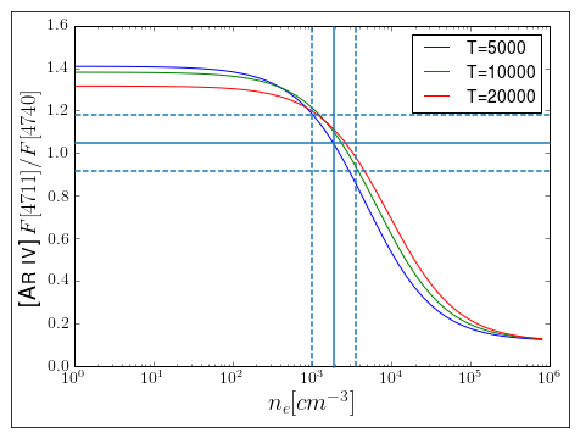

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
img = mpimg.imread('ArIV_doublet_density.png')
ax.imshow(img)
# Convert the pixel location to a ratio value (yscale)
# By trial and error, ratio=1 is at y=127, ratio=0 is at y=292
# This gives a slope of ratio/y=165, therefore a 1 pixel jump in y is .006 in the ratio
# ratio of 1.112 is at y=127-(.112/.006) ~ 108
# upper and +/- 1 sigma range (0.140) is +/- 23 pixels 
# Similarly 65 pixels in x is an increase of 1 dex with a zero at 52

yrange = np.linspace(13, 292, 2)
xrange = np.linspace(52, 442, 2)

ax.plot(xrange, [108, 108])
ax.plot(xrange, [108-23, 108-23], 'C0--')
ax.plot(xrange, [108+23, 108+23], 'C0--')
ax.plot([265, 265], yrange, 'C0')
ax.plot([247, 247], yrange, 'C0--')
ax.plot([283, 283], yrange, 'C0--')

ax.set_yticks([])
ax.set_xticks([])
# x values (pixels) are 265 +/- 18, or a dex value of 3.27 +/- .27
print('Number density of nebula is {0:4.5g} with a 1 sigma range of {1:4.5g} to {2:4.5g}.'.format(
        10**3.27, 10**3, 10**(3.27+.27)))
print('Number density of nebula is {0:4.5g} with a 3 sigma range of {1:4.5g} to {2:4.5g}.'.format(
        10**3.27, 10**(3.27-3*.27), 10**(3.27+3*.27)))
print('Literature value (Atomic Data from the Iron Project, Chen 2000) is between 3x10^3 and 17x10^3.')
plt.show()

Fluxes:  2007.2556711768955 600.8351487612338
Flux Ratio (Beta/Gamma):  3.340776043670774 +/- 0.155356599153


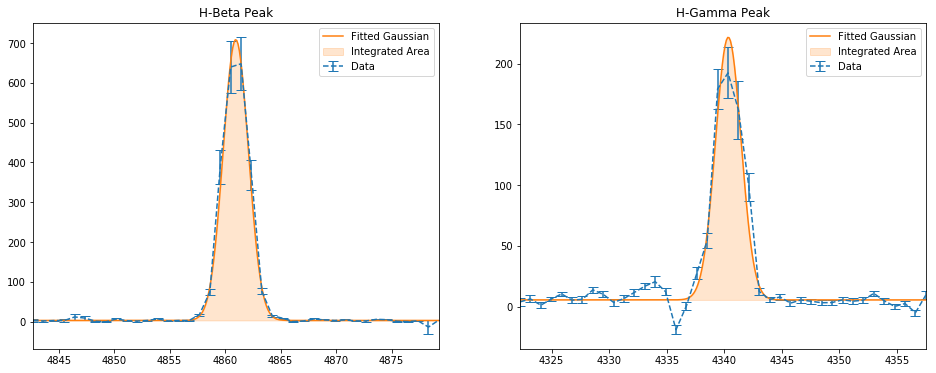

In [53]:
# H beta-gamma Line Ratio
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    
HB = fit_gaussian(axs[0], exp_wl[595-20:595+20], neb_fluxcali[595-20:595+20], sig_neb_fluxcali[595-20:595+20])[0]
HG = fit_gaussian(axs[1], exp_wl[29-20:29+20], neb_fluxcali[29-20:29+20], sig_neb_fluxcali[29-20:29+20])[0]

HB_sig = np.sqrt(HB)
HG_sig = np.sqrt(HG)

axs[0].set_title('H-Beta Peak')
axs[1].set_title('H-Gamma Peak')

print('Fluxes: ', HB, HG)
HBG_ratio = HB/HG
HBG_ratio_sig=HBG_ratio*np.sqrt((HB_sig/HB)**2 + (HG_sig/HG)**2 )
print('Flux Ratio (Beta/Gamma): ', HBG_ratio, '+/-', HBG_ratio_sig)

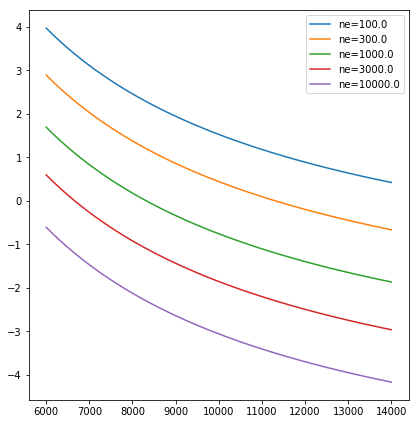

In [25]:
ne = [1e2, 3e2, 1e3, 3e3, 1e4]
temp = np.linspace(6000, 14000)
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
fig.tight_layout()

for i in range(len(ne)):
    axs.plot(temp, np.log(7.9*np.exp(3.29e4/temp)/(1+45e-4*ne[i]*pow(temp, 0.5))), label='ne={0}'.format(ne[i]))

plt.legend()
plt.show()

(32, 765)
(27, 765)
(32, 765)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


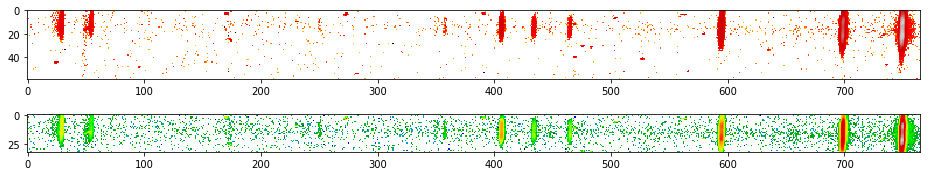

In [93]:
print(sum_neb.shape)
print(sum_nebbg.shape)

bigband = np.append(sum_neb, sum_nebbg, axis=0)
caliband = [row-avgcounts_nebbg for row in sum_neb]

print(np.array(caliband).shape)

fig, axs = plt.subplots(2, 1, figsize=(16, 3))
axs[1].imshow(np.log([row-avgcounts_nebbg for row in sum_neb]), cmap='nipy_spectral')
axs[0].imshow(np.log(bigband), cmap='nipy_spectral')
plt.show()

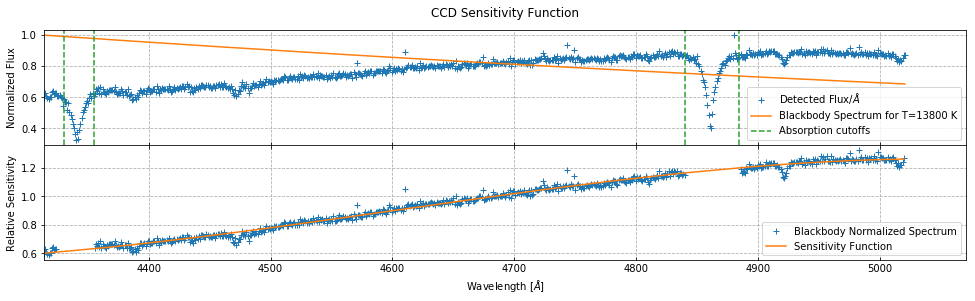

In [205]:
fig = plt.figure(figsize=(16, 4))
ax =[0, 0]
ax[0] = fig.add_axes([.1, .5, .8, .4])
ax[1] = fig.add_axes([.1, .1, .8, .4])

ax[0].plot(exp_wl,norm_refstar1d, '+', label='Detected Flux/$\AA$')
ax[0].plot(exp_wl,norm_bbflux, label='Blackbody Spectrum for T=13800 K')
ax[0].axvline(x=4330,ls='--',color='C2', label='Absorption cutoffs')
ax[0].axvline(x=4355,ls='--',color='C2')
ax[0].axvline(x=4840,ls='--',color='C2')
ax[0].axvline(x=4885,ls='--',color='C2')
ax[0].set_xlim(min(exp_wl), max(exp_wl)+50)
ax[0].set_ylabel('Normalized Flux')
ax[0].tick_params(axis='x', direction='in')
ax[0].legend(loc=4)
ax[0].grid(linestyle='--')

ax[1].plot(cut_wl,cut_ratio,'+',label='Blackbody Normalized Spectrum')
ax[1].plot(cut_wl,sensitivity_fit(cut_wl),label='Sensitivity Function')
ax[1].set_xlim(min(exp_wl), max(exp_wl)+50)
ax[1].set_xlabel('Wavelength [$\AA$]')
ax[1].set_ylabel('Relative Sensitivity')
ax[1].tick_params(axis='x', top=True, direction='in')
ax[1].legend(loc=4)
ax[1].grid(linestyle='--')

fig.suptitle('CCD Sensitivity Function')

plt.show()

In [311]:
#### fig, axs = plt.subplots(7, 3, figsize=(15, 18))

#axs[row, col]
# Titles
axs[0, 0].set_title(r'H$\beta$ Data')
axs[0, 1].set_title(r'H$\beta$ Profile')
axs[1, 0].set_title(r'H$\gamma$ Data')
axs[1, 1].set_title(r'H$\gamma$ Profile')
axs[2, 0].set_title(r'ArIV 4711 $\AA$ Data')
axs[2, 1].set_title(r'ArIV 4711 $\AA$ Profile')
axs[3, 0].set_title(r'ArIV 4740 $\AA$ Data')
axs[3, 1].set_title(r'ArIV 4740 $\AA$ Profile')
axs[4, 0].set_title(r'OIII 4363 $\AA$ Data')
axs[4, 1].set_title(r'OIII 4363 $\AA$ Profile')
axs[5, 0].set_title(r'OIII 4959 $\AA$ Data')
axs[5, 1].set_title(r'OIII 4959 $\AA$ Profile')
axs[6, 0].set_title(r'OIII 5007 $\AA$ Data')
axs[6, 1].set_title(r'OIII 5007 $\AA$ Profile')

# Populate plots with data
HB = fit_gaussian(axs[0], exp_wl[595-20:595+20], neb_fluxcali[595-20:595+20], sig_neb_fluxcali[595-20:595+20])
HG = fit_gaussian(axs[1], exp_wl[29-20:29+20], neb_fluxcali[29-20:29+20], sig_neb_fluxcali[29-20:29+20])
ArIV_4711 = fit_gaussian(axs[2], exp_wl[434-20:434+20], neb_fluxcali[434-20:434+20], sig_neb_fluxcali[434-20:434+20])
ArIV_4740 = fit_gaussian(axs[3], exp_wl[465-20:465+20], neb_fluxcali[465-20:465+20], sig_neb_fluxcali[465-20:465+20])
OIII_4363 = fit_gaussian(axs[4], exp_wl[55-20:55+20], neb_fluxcali[55-20:55+20], sig_neb_fluxcali[55-20:55+20])
OIII_4959 = fit_gaussian(axs[5], exp_wl[699-20:699+20], neb_fluxcali[699-20:699+20], sig_neb_fluxcali[699-20:699+20])
OIII_5007 = fit_gaussian(axs[6], exp_wl[749-20:749+20], neb_fluxcali[749-20:749+20], sig_neb_fluxcali[749-20:749+20])

print(HB, HG, ArIV_4711, ArIV_4740, OIII_4363, OIII_4959, OIII_5007)

axs[3, 0].set_ylabel('Flux [erg $s^{-1}$ $cm^{-2}$ $\AA^{-1}$]')
axs[6, 1].set_xlabel('Wavelength [$\AA$]')

fig.tight_layout()
plt.show()

(705.78775505178203, 4860.9588337175164, 1.1345891864462043, 3.0294651799235446, 2007.2556711768955, 44.802406979724822) (216.18488983008444, 4340.3449758460538, 1.1087664109204936, 5.5704617003937944, 600.8351487612338, 24.511938902527351) (46.559280267444898, 4711.1617315730591, 1.1384049172134945, 3.5580047775906811, 132.85960451483302, 11.526474071234144) (46.866127913736641, 4739.7196411365721, 1.0169314780093754, 3.0884438579663436, 119.46500300731284, 10.930004712135894) (68.119724860202254, 4362.528053823964, 1.6370231782902096, 3.6808502410106176, 279.52306379431894, 16.718943261890654) (2777.8024225763738, 4958.9726059998193, 1.1087093997178648, 5.4202733351922605, 7719.8527400302755, 87.862692538017953) (7307.9578206474289, 5007.1251834364657, 1.1735395829651025, 7.3006898384108734, 21497.289694485346, 146.61954062977193)
